In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/User/Downloads/pricedata.csv')

In [3]:
data.fillna(0)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2336,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,1.014672e+11
2337,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,9.180985e+10
2338,2021-02-10,46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,8.730109e+10
2339,2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,47909.332031,8.138891e+10


In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2336,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,1.014672e+11
2337,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,9.180985e+10
2338,2021-02-10,46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,8.730109e+10
2339,2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,47909.332031,8.138891e+10
2340,2021-02-12,47877.035156,48745.734375,46424.976563,47504.851563,47504.851563,7.655504e+10


In [6]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import numpy as np
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna

In [7]:
def Plot_OHCL(df, ax1_indicators=[], ax2_indicators=[]):
    df_original = df.copy()
    # necessary convert to datetime
    df["Date"] = pd.to_datetime(df.Date)
    df["Date"] = df["Date"].apply(mpl_dates.date2num)

    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    
    # We are using the style ‘ggplot’
    plt.style.use('ggplot')
    
    # figsize attribute allows us to specify the width and height of a figure in unit inches
    fig = plt.figure(figsize=(16,8)) 

    # Create top subplot for price axis
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)

    # Create bottom subplot for volume which shares its x-axis
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

    candlestick_ohlc(ax1, df.values, width=0.8/24, colorup='green', colordown='red', alpha=0.8)
    ax1.set_ylabel('Price', fontsize=12)
    plt.xlabel('Date')
    plt.xticks(rotation=45)

    # plot all indicators to ax1 subplot
    for indicator in ax1_indicators:
        ax1.plot(df["Date"], df_original[indicator],'-')

    # plot all indicators to ax2 subplot
    for indicator in ax2_indicators:
        ax2.plot(df["Date"], df_original[indicator],'-')

    # beautify the x-labels (Our Date format)
    ax1.xaxis.set_major_formatter(mpl_dates.DateFormatter('%y-%m-%d'))
    fig.autofmt_xdate()
    fig.tight_layout()
    
    plt.show()

<ipython-input-7-bee667932b76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df.Date)
<ipython-input-7-bee667932b76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].apply(mpl_dates.date2num)


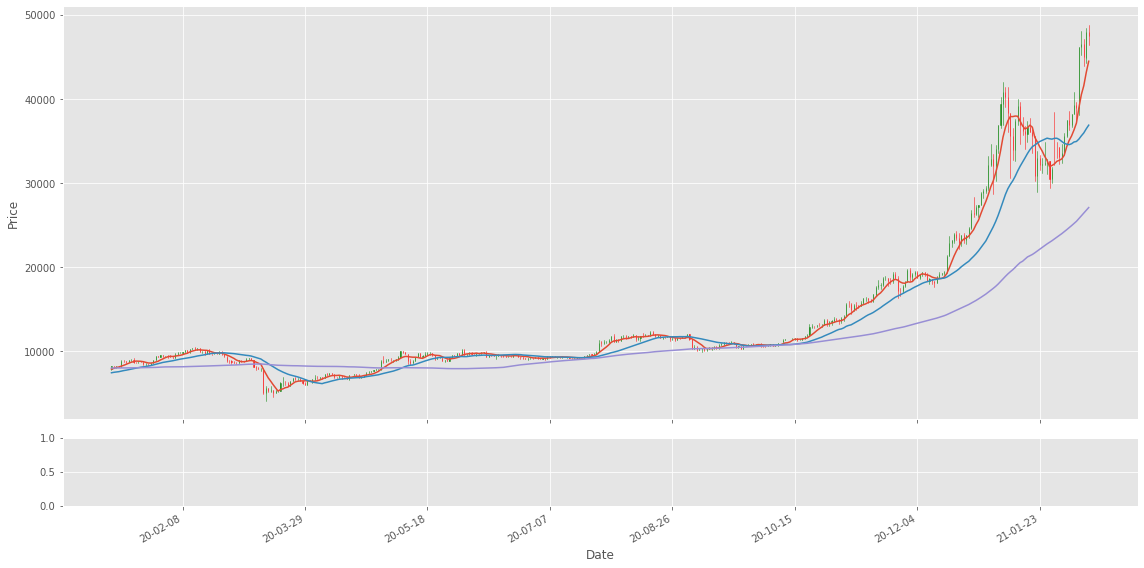

In [8]:
import pandas as pd
from ta.trend import SMAIndicator

def AddIndicators(df):
    # Add Simple Moving Average (SMA) indicators
    df["sma7"] = SMAIndicator(close=df["Close"], window=7, fillna=True).sma_indicator()
    df["sma25"] = SMAIndicator(close=df["Close"], window=25, fillna=True).sma_indicator()
    df["sma99"] = SMAIndicator(close=df["Close"], window=99, fillna=True).sma_indicator()
    
    return df

if __name__ == "__main__":   
    df = pd.read_csv('C:/Users/User/Downloads/pricedata.csv')
    df = df.sort_values('Date')
    df = AddIndicators(df)

    test_df = df[-400:]

    # Add Simple Moving Average
    Plot_OHCL(test_df, ax1_indicators=["sma7", "sma25", "sma99"])

<ipython-input-7-bee667932b76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df.Date)
<ipython-input-7-bee667932b76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].apply(mpl_dates.date2num)


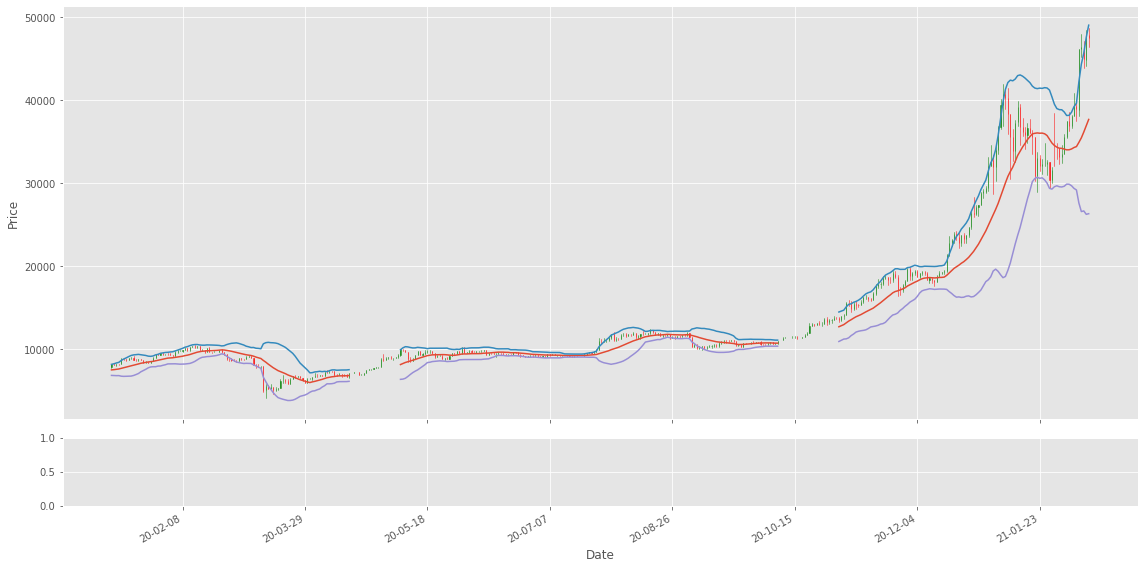

In [9]:
#Bollinger Bands

import pandas as pd
from ta.volatility import BollingerBands

def AddIndicators(df):
    # Add Bollinger Bands indicator
    indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()
    
    return df

if __name__ == "__main__":   
    df = pd.read_csv('C:/Users/User/Downloads/pricedata.csv')
    df = df.sort_values('Date')
    df = AddIndicators(df)

    test_df = df[-400:]

    # Add Bollinger Bands
    Plot_OHCL(test_df, ax1_indicators=["bb_bbm", "bb_bbh", "bb_bbl"])

<ipython-input-7-bee667932b76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df.Date)
<ipython-input-7-bee667932b76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].apply(mpl_dates.date2num)


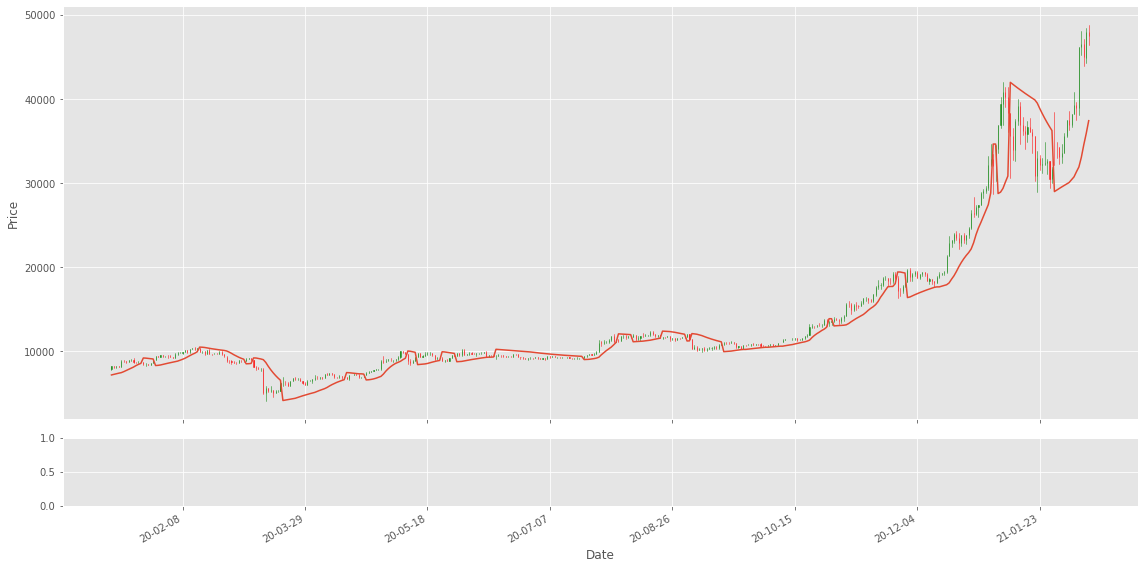

In [10]:
#Parabolic Stop and Reverse (Parabolic SAR)


import pandas as pd
from ta.trend import PSARIndicator

def AddIndicators(df):
    # Add Parabolic Stop and Reverse (Parabolic SAR) indicator
    indicator_psar = PSARIndicator(high=df["High"], low=df["Low"], close=df["Close"], step=0.02, max_step=2, fillna=True)
    df['psar'] = indicator_psar.psar()
    
    return df

if __name__ == "__main__":   
    df = pd.read_csv('C:/Users/User/Downloads/pricedata.csv')
    df = df.sort_values('Date')
    df = AddIndicators(df)

    test_df = df[-400:]

    # Add Parabolic Stop and Reverse
    Plot_OHCL(test_df, ax1_indicators=["psar"])

<ipython-input-7-bee667932b76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df.Date)
<ipython-input-7-bee667932b76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].apply(mpl_dates.date2num)


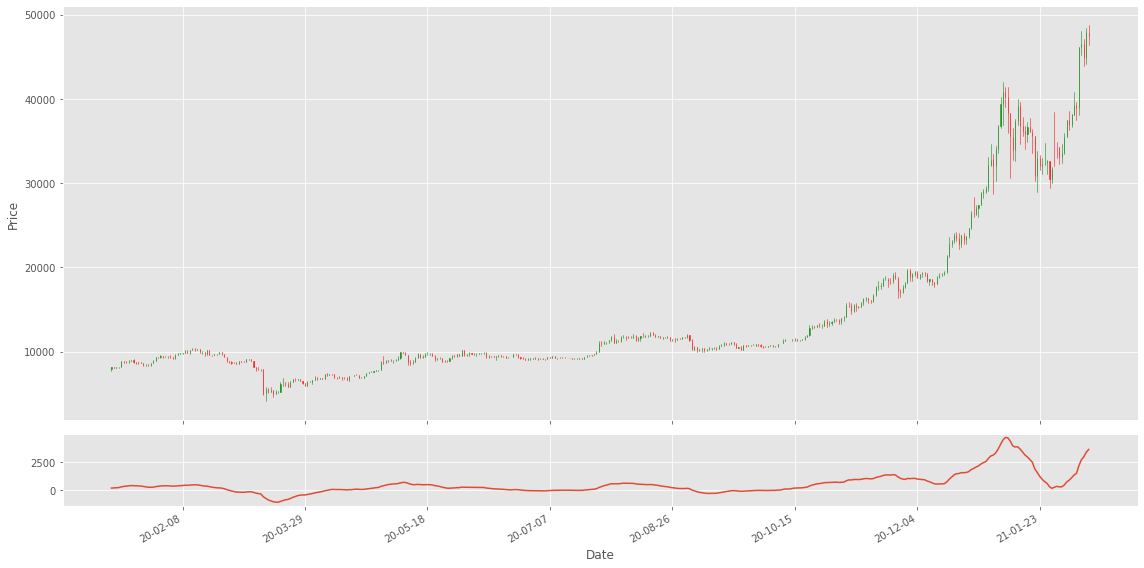

In [11]:
#Moving Average Convergence Divergence (MACD)

import pandas as pd
from ta.trend import macd

def AddIndicators(df):
    # Add Moving Average Convergence Divergence (MACD) indicator
    df["MACD"] = macd(close=df["Close"], window_slow=26, window_fast=12, fillna=True)
    
    return df

if __name__ == "__main__":   
    df = pd.read_csv('C:/Users/User/Downloads/pricedata.csv')
    df = df.sort_values('Date')
    df = AddIndicators(df)

    test_df = df[-400:]

    # Add Moving Average Convergence Divergence
    Plot_OHCL(test_df, ax2_indicators=["MACD"])

<ipython-input-7-bee667932b76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df.Date)
<ipython-input-7-bee667932b76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].apply(mpl_dates.date2num)


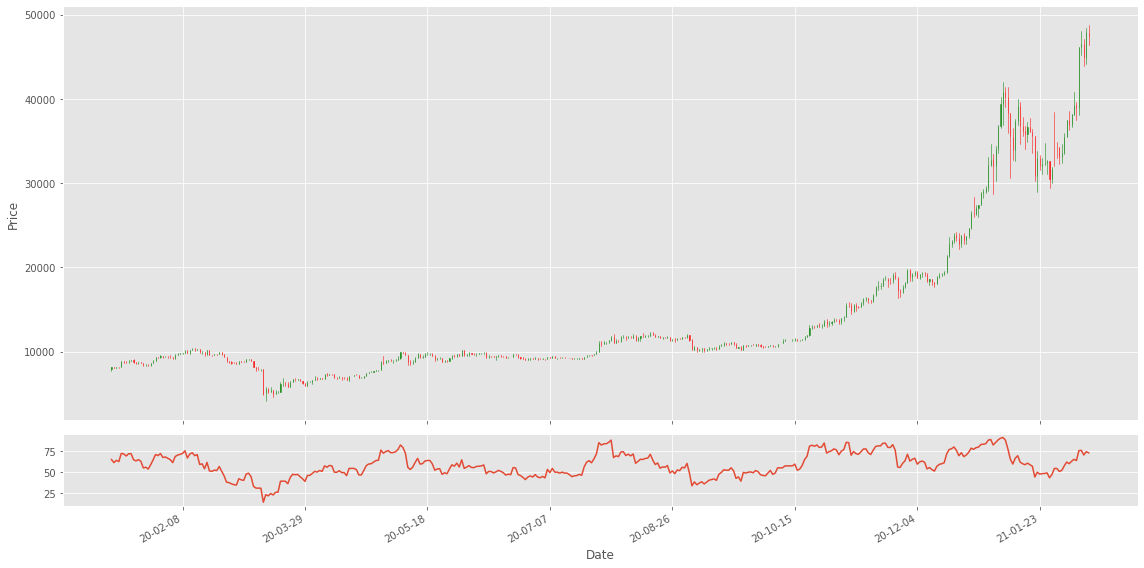

In [12]:
#Relative Strength Index (RSI)

import pandas as pd
from ta.momentum import rsi

def AddIndicators(df):
    # Add Relative Strength Index (RSI) indicator
    df["RSI"] = rsi(close=df["Close"], window=14, fillna=True)
    
    return df

if __name__ == "__main__":   
    df = pd.read_csv('C:/Users/User/Downloads/pricedata.csv')
    df = df.sort_values('Date')
    df = AddIndicators(df)

    test_df = df[-400:]

    # Add Relative Strength Index
    Plot_OHCL(test_df, ax2_indicators=["RSI"])

In [13]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

def Plot_OHCL(df):
    df_original = df.copy()
    # necessary convert to datetime
    df["Date"] = pd.to_datetime(df.Date)
    df["Date"] = df["Date"].apply(mpl_dates.date2num)

    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    
    # We are using the style ‘ggplot’
    plt.style.use('ggplot')
    
    # figsize attribute allows us to specify the width and height of a figure in unit inches
    fig = plt.figure(figsize=(16,8)) 

    # Create top subplot for price axis
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)

    # Create bottom subplot for volume which shares its x-axis
    ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

    candlestick_ohlc(ax1, df.values, width=0.8/24, colorup='green', colordown='red', alpha=0.8)
    ax1.set_ylabel('Price', fontsize=12)
    plt.xlabel('Date')
    plt.xticks(rotation=45)

    # Add Simple Moving Average
    ax1.plot(df["Date"], df_original['sma7'],'-')
    ax1.plot(df["Date"], df_original['sma25'],'-')
    ax1.plot(df["Date"], df_original['sma99'],'-')

    # Add Bollinger Bands
    ax1.plot(df["Date"], df_original['bb_bbm'],'-')
    ax1.plot(df["Date"], df_original['bb_bbh'],'-')
    ax1.plot(df["Date"], df_original['bb_bbl'],'-')

    # Add Parabolic Stop and Reverse
    ax1.plot(df["Date"], df_original['psar'],'.')

    # # Add Moving Average Convergence Divergence
    ax2.plot(df["Date"], df_original['MACD'],'-')

    # # Add Relative Strength Index
    ax2.plot(df["Date"], df_original['RSI'],'-')

    # beautify the x-labels (Our Date format)
    ax1.xaxis.set_major_formatter(mpl_dates.DateFormatter('%y-%m-%d'))# %H:%M:%S'))
    fig.autofmt_xdate()
    fig.tight_layout()
    
    plt.show()

<ipython-input-13-e780e4212536>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df.Date)
<ipython-input-13-e780e4212536>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].apply(mpl_dates.date2num)


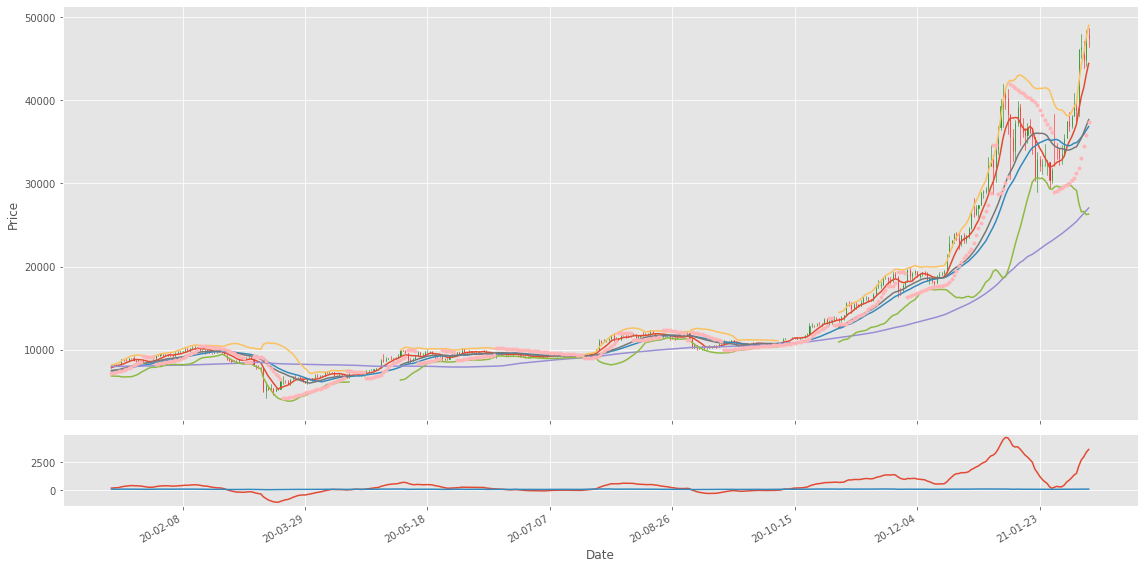

In [14]:
import pandas as pd
from ta.trend import SMAIndicator, macd, PSARIndicator
from ta.volatility import BollingerBands
from ta.momentum import rsi
#from utils import Plot_OHCL

def AddIndicators(df):
    # Add Simple Moving Average (SMA) indicators
    df["sma7"] = SMAIndicator(close=df["Close"], window=7, fillna=True).sma_indicator()
    df["sma25"] = SMAIndicator(close=df["Close"], window=25, fillna=True).sma_indicator()
    df["sma99"] = SMAIndicator(close=df["Close"], window=99, fillna=True).sma_indicator()
    
    # Add Bollinger Bands indicator
    indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()

    # Add Parabolic Stop and Reverse (Parabolic SAR) indicator
    indicator_psar = PSARIndicator(high=df["High"], low=df["Low"], close=df["Close"], step=0.02, max_step=2, fillna=True)
    df['psar'] = indicator_psar.psar()

    # Add Moving Average Convergence Divergence (MACD) indicator
    df["MACD"] = macd(close=df["Close"], window_slow=26, window_fast=12, fillna=True) # mazas

    # Add Relative Strength Index (RSI) indicator
    df["RSI"] = rsi(close=df["Close"], window=14, fillna=True) # mazas
    
    return df

if __name__ == "__main__":   
    df = pd.read_csv('C:/Users/User/Downloads/pricedata.csv')
    df = df.sort_values('Date')
    df = AddIndicators(df)

    test_df = df[-400:]

    Plot_OHCL(test_df)